In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,roc_curve,classification_report,roc_auc_score

In [2]:
data=pd.read_csv("back_order.csv")

In [3]:
data.head()

,Unnamed: 0,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0,3352105,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
1,1,3403239,6.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
2,2,3286560,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
3,3,3299078,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
4,4,3314098,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,...,0.0,0.95,0.94,0.0,No,No,No,Yes,No,Yes


In [4]:
data.shape

(9688, 24)

In [5]:
len(data.columns)

24

In [6]:
data.columns

Index(['Unnamed: 0', 'sku', 'national_inv', 'lead_time', 'in_transit_qty',
       'forecast_3_month', 'forecast_6_month', 'forecast_9_month',
       'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month',
       'min_bank', 'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'went_on_backorder'],
      dtype='object')

In [7]:
data=data.drop(columns=["Unnamed: 0"])

In [8]:
data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,3352105,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
1,3403239,6.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
2,3286560,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,0.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
3,3299078,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,2.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
4,3314098,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,0.0,...,0.0,0.95,0.94,0.0,No,No,No,Yes,No,Yes


In [9]:
data.dtypes

sku                    int64
national_inv         float64
lead_time            float64
in_transit_qty       float64
forecast_3_month     float64
forecast_6_month     float64
forecast_9_month     float64
sales_1_month        float64
sales_3_month        float64
sales_6_month        float64
sales_9_month        float64
min_bank             float64
potential_issue       object
pieces_past_due      float64
perf_6_month_avg     float64
perf_12_month_avg    float64
local_bo_qty         float64
deck_risk             object
oe_constraint         object
ppap_risk             object
stop_auto_buy         object
rev_stop              object
went_on_backorder     object
dtype: object

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9688 entries, 0 to 9687
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sku                9688 non-null   int64  
 1   national_inv       9688 non-null   float64
 2   lead_time          8473 non-null   float64
 3   in_transit_qty     9688 non-null   float64
 4   forecast_3_month   9688 non-null   float64
 5   forecast_6_month   9688 non-null   float64
 6   forecast_9_month   9688 non-null   float64
 7   sales_1_month      9688 non-null   float64
 8   sales_3_month      9688 non-null   float64
 9   sales_6_month      9688 non-null   float64
 10  sales_9_month      9688 non-null   float64
 11  min_bank           9688 non-null   float64
 12  potential_issue    9688 non-null   object 
 13  pieces_past_due    9688 non-null   float64
 14  perf_6_month_avg   9688 non-null   float64
 15  perf_12_month_avg  9688 non-null   float64
 16  local_bo_qty       9688 

In [11]:
data.isna().any()

sku                  False
national_inv         False
lead_time             True
in_transit_qty       False
forecast_3_month     False
forecast_6_month     False
forecast_9_month     False
sales_1_month        False
sales_3_month        False
sales_6_month        False
sales_9_month        False
min_bank             False
potential_issue      False
pieces_past_due      False
perf_6_month_avg     False
perf_12_month_avg    False
local_bo_qty         False
deck_risk            False
oe_constraint        False
ppap_risk            False
stop_auto_buy        False
rev_stop             False
went_on_backorder    False
dtype: bool

In [12]:
data.isna().sum()

sku                     0
national_inv            0
lead_time            1215
in_transit_qty          0
forecast_3_month        0
forecast_6_month        0
forecast_9_month        0
sales_1_month           0
sales_3_month           0
sales_6_month           0
sales_9_month           0
min_bank                0
potential_issue         0
pieces_past_due         0
perf_6_month_avg        0
perf_12_month_avg       0
local_bo_qty            0
deck_risk               0
oe_constraint           0
ppap_risk               0
stop_auto_buy           0
rev_stop                0
went_on_backorder       0
dtype: int64

In [13]:
l=[i for i in data.columns if data[i].dtypes=="object"]
l

['potential_issue',
 'deck_risk',
 'oe_constraint',
 'ppap_risk',
 'stop_auto_buy',
 'rev_stop',
 'went_on_backorder']

In [14]:
for i in l:
    print(i,":",data[i].unique())

potential_issue : ['No' 'Yes']
deck_risk : ['No' 'Yes']
oe_constraint : ['No' 'Yes']
ppap_risk : ['No' 'Yes']
stop_auto_buy : ['Yes' 'No']
rev_stop : ['No' 'Yes']
went_on_backorder : ['Yes' 'No']


In [15]:
data=data.drop(columns=["sku"])

In [16]:
data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
1,6.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,Yes
2,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
3,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,2.0,2.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
4,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.95,0.94,0.0,No,No,No,Yes,No,Yes


In [17]:
data=data.dropna()
data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
2,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
3,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,2.0,2.0,...,0.0,0.70,0.73,0.0,No,No,No,Yes,No,Yes
4,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.95,0.94,0.0,No,No,No,Yes,No,Yes
5,0.0,4.0,0.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.57,0.68,0.0,Yes,No,No,Yes,No,Yes
6,0.0,8.0,0.0,2.0,3.0,4.0,0.0,1.0,2.0,2.0,...,0.0,0.56,0.68,0.0,No,No,No,Yes,No,Yes


In [18]:
for i in l:
    data[i]=data[i].map({"Yes":0,"No":1})

In [19]:
data.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
2,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.70,0.73,0.0,1,1,1,0,1,0
3,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,2.0,2.0,...,0.0,0.70,0.73,0.0,1,1,1,0,1,0
4,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.95,0.94,0.0,1,1,1,0,1,0
5,0.0,4.0,0.0,10.0,10.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.57,0.68,0.0,0,1,1,0,1,0
6,0.0,8.0,0.0,2.0,3.0,4.0,0.0,1.0,2.0,2.0,...,0.0,0.56,0.68,0.0,1,1,1,0,1,0


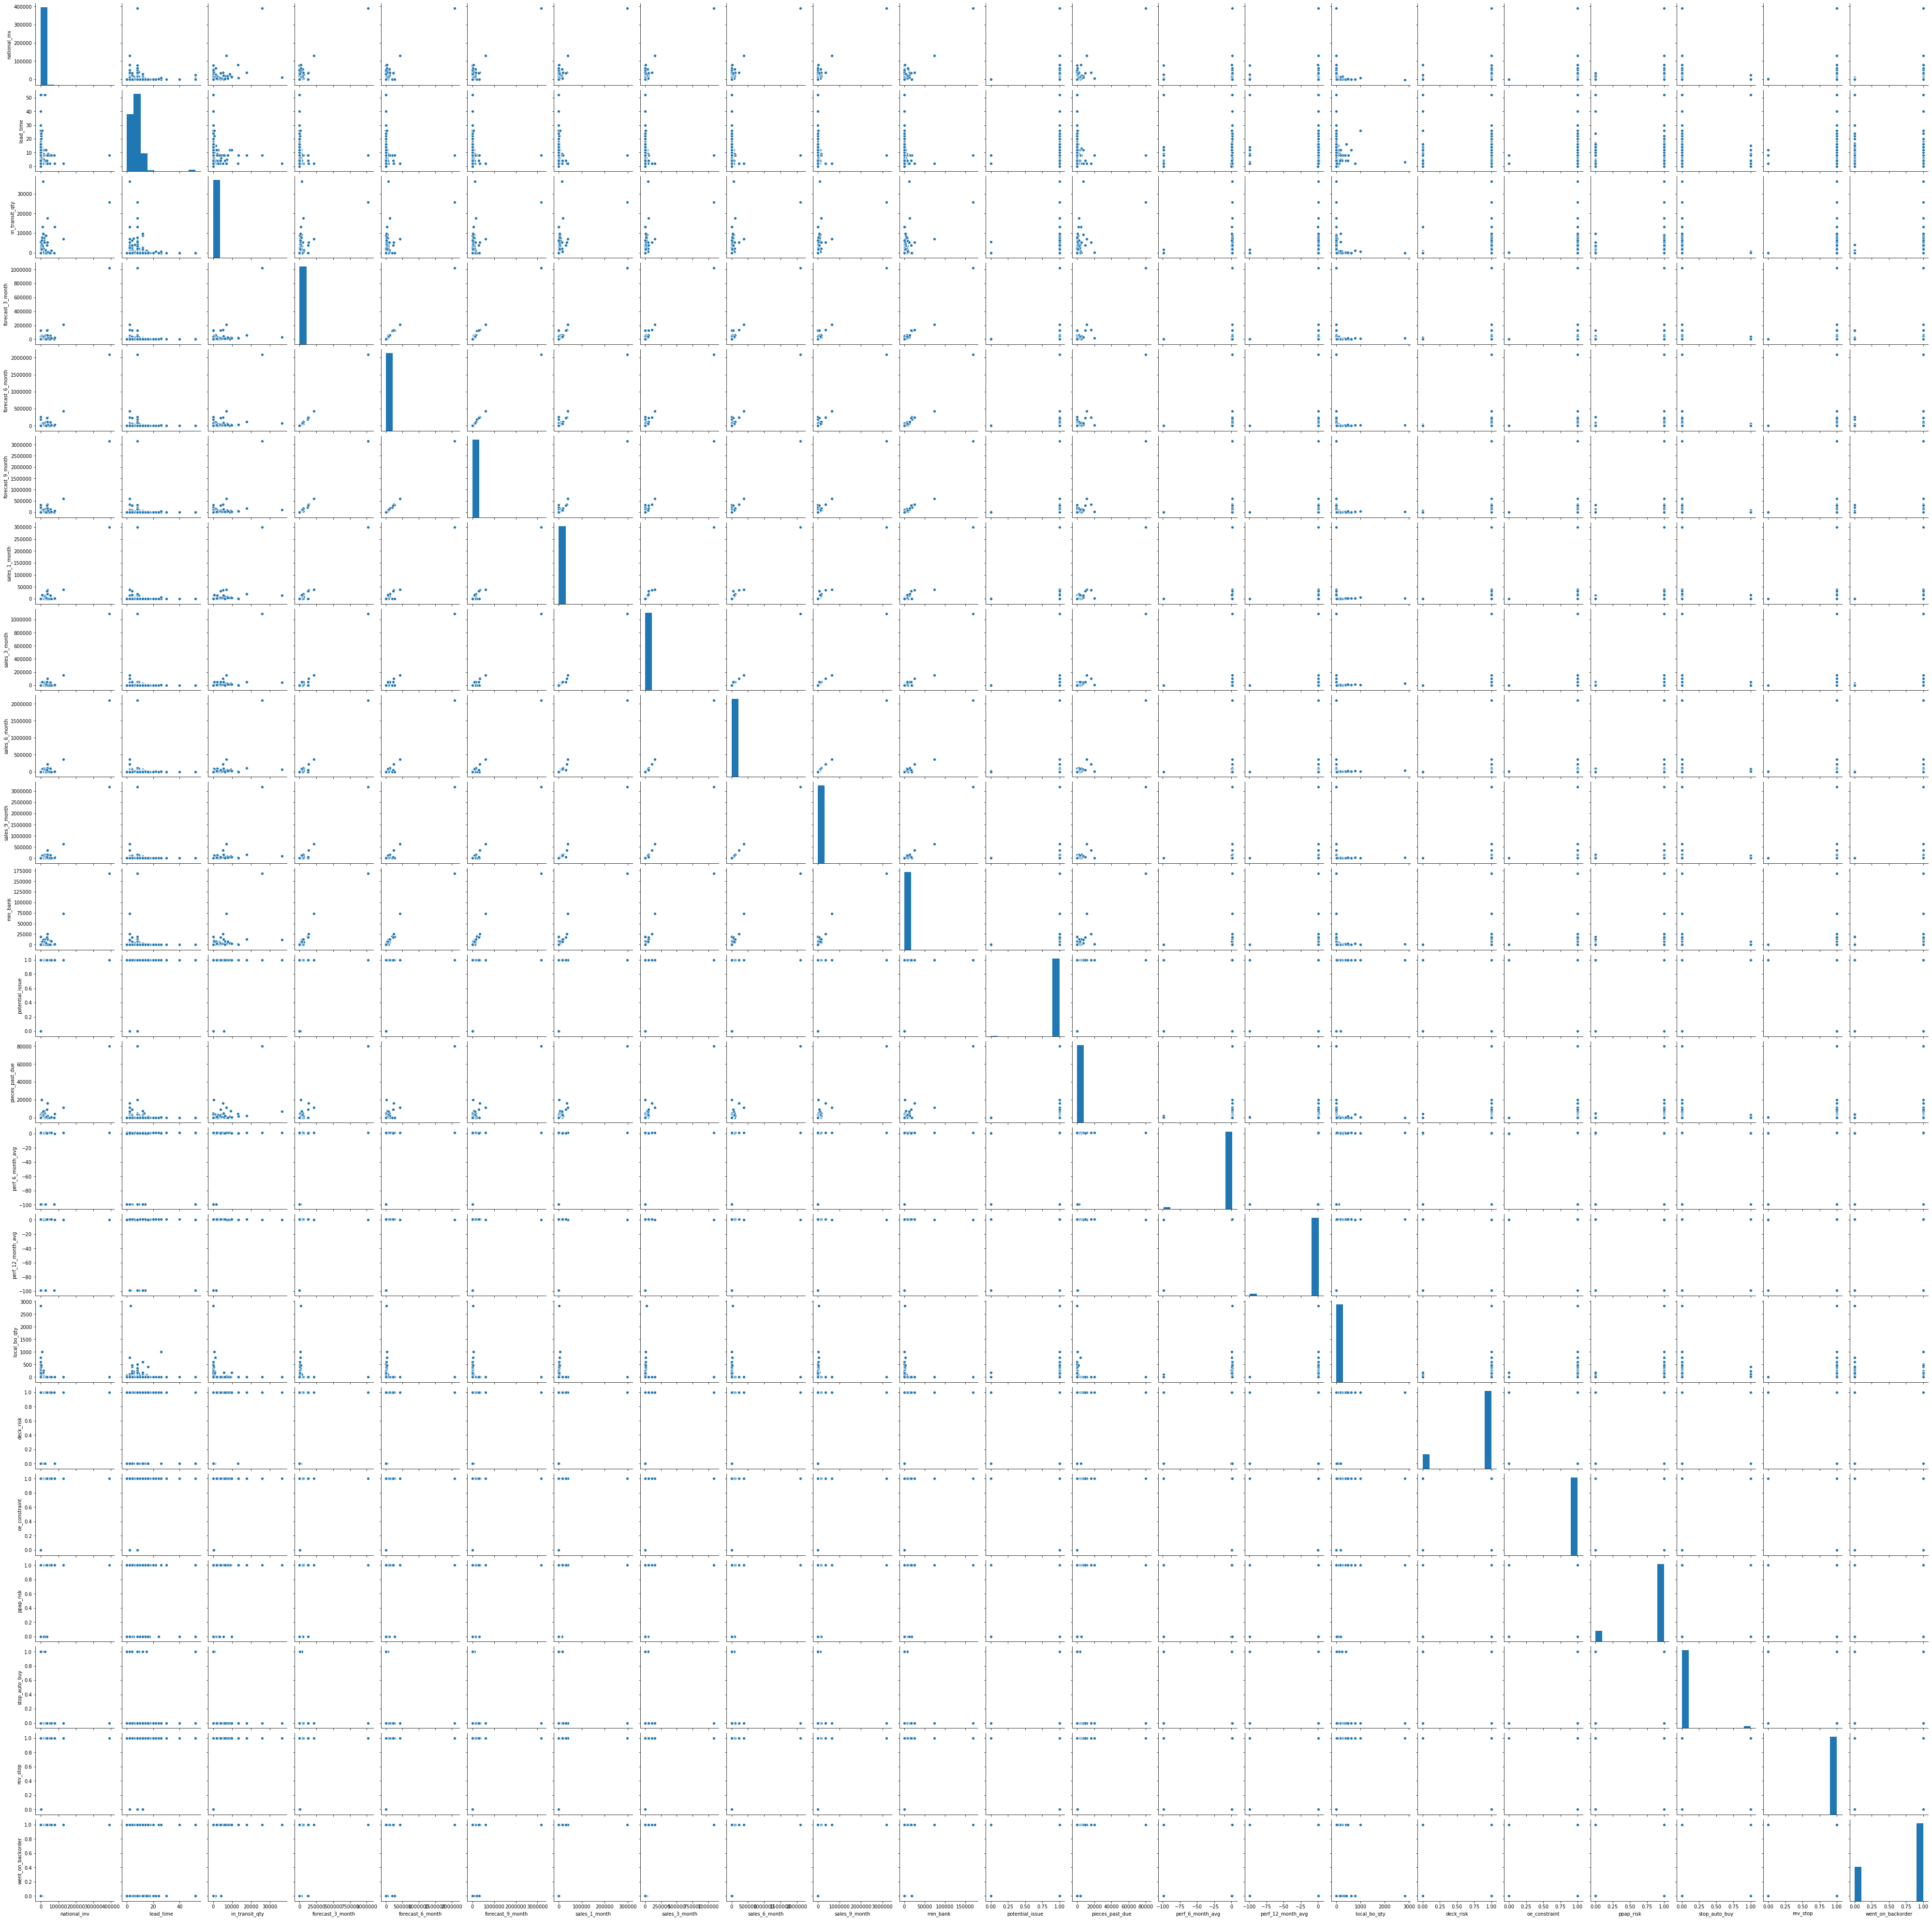

In [20]:
sns.pairplot(data=data)

In [21]:
l=list(data["went_on_backorder"])
print(l.count(0),l.count(1))

2604 5869


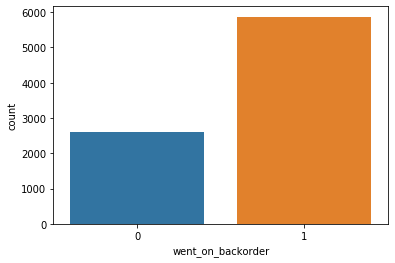

In [22]:
sns.countplot(x='went_on_backorder',data=data)

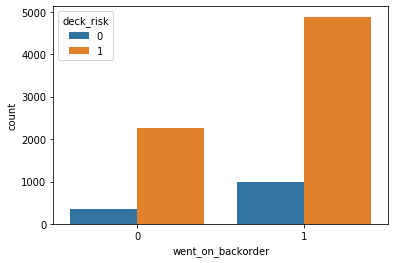

In [23]:
sns.countplot(x='went_on_backorder',hue="deck_risk",data=data)

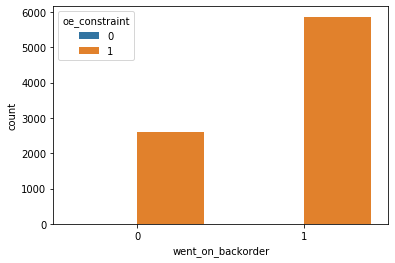

In [24]:
sns.countplot(x='went_on_backorder',hue="oe_constraint",data=data)

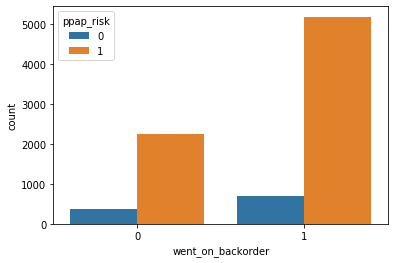

In [25]:
sns.countplot(x='went_on_backorder',hue="ppap_risk",data=data)

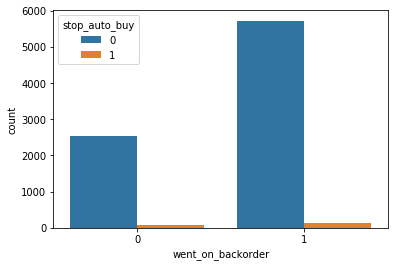

In [26]:
sns.countplot(x='went_on_backorder',hue="stop_auto_buy",data=data)

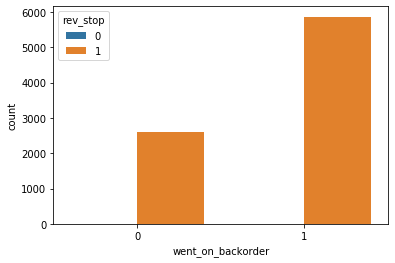

In [27]:
sns.countplot(x='went_on_backorder',hue="rev_stop",data=data)

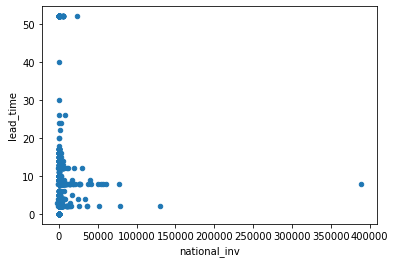

In [28]:
data.plot.scatter('national_inv','lead_time')

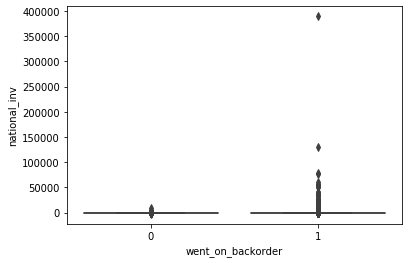

In [29]:
sns.boxplot(x="went_on_backorder", y="national_inv", data=data)

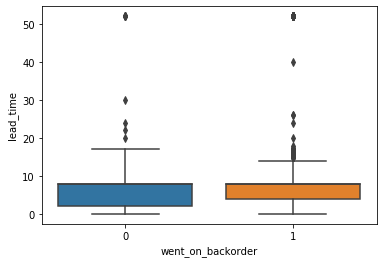

In [30]:
sns.boxplot(x="went_on_backorder", y="lead_time", data=data)

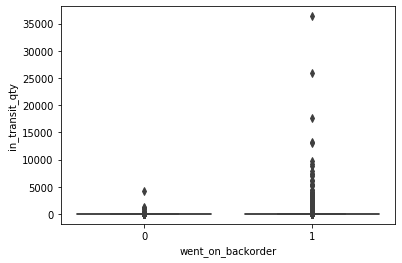

In [31]:
sns.boxplot(x="went_on_backorder", y="in_transit_qty", data=data)

In [32]:
l=["forecast_3_month","forecast_6_month","forecast_9_month"]

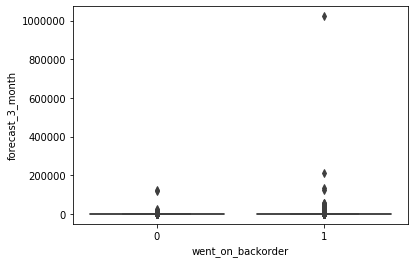

In [33]:
sns.boxplot(x="went_on_backorder", y=l[0], data=data)

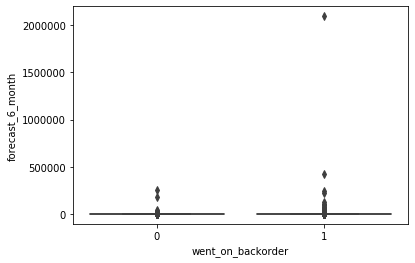

In [34]:
sns.boxplot(x="went_on_backorder", y=l[1], data=data)

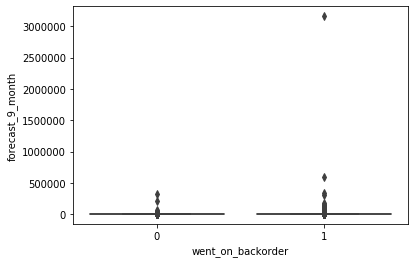

In [35]:
sns.boxplot(x="went_on_backorder", y=l[2], data=data)

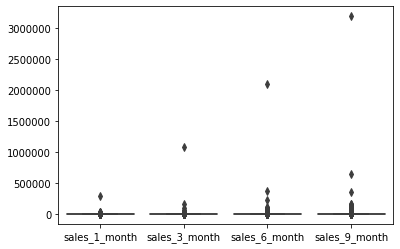

In [36]:
sns.boxplot(data=data[["sales_1_month","sales_3_month","sales_6_month","sales_9_month"]])

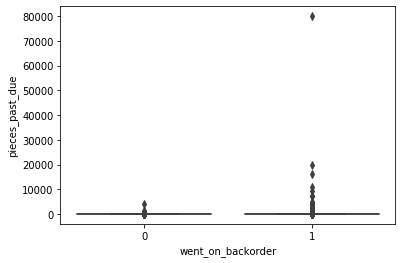

In [37]:
sns.boxplot(x="went_on_backorder", y="pieces_past_due", data=data)

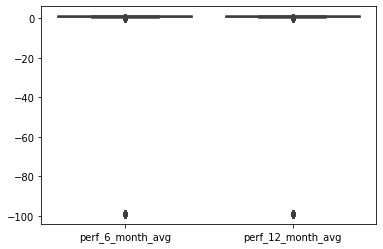

In [38]:
sns.boxplot(data=data[["perf_6_month_avg","perf_12_month_avg"]])

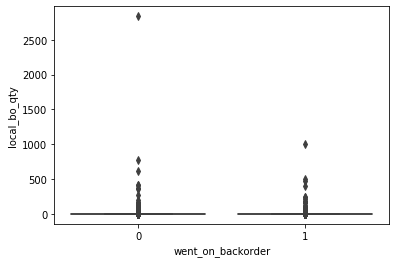

In [39]:
sns.boxplot(x="went_on_backorder", y="local_bo_qty", data=data)

In order to visualize data in a clear way consider data range between 0 and 90th percentile

In [40]:
Q1=data.quantile(0.1)
Q2=data.quantile(0.90)

In [41]:
data1=data[~((data<Q1) | (data>Q2)).any(axis=1)]
data1.shape

(4914, 22)

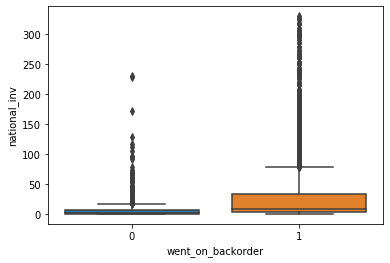

In [42]:
sns.boxplot(x="went_on_backorder", y="national_inv", data=data1)

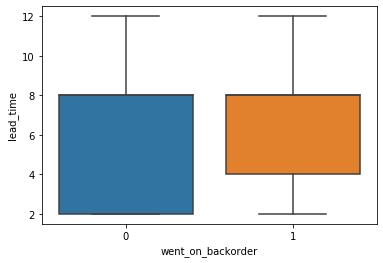

In [43]:
sns.boxplot(x="went_on_backorder", y="lead_time", data=data1)

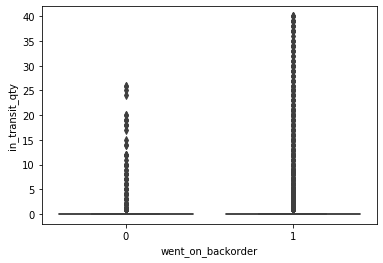

In [44]:
sns.boxplot(x="went_on_backorder", y="in_transit_qty", data=data1)

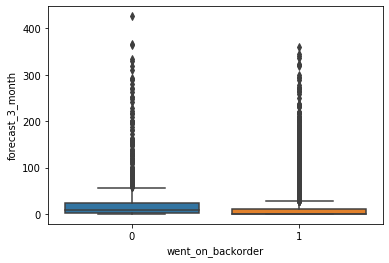

In [45]:
sns.boxplot(x="went_on_backorder", y=l[0], data=data1)

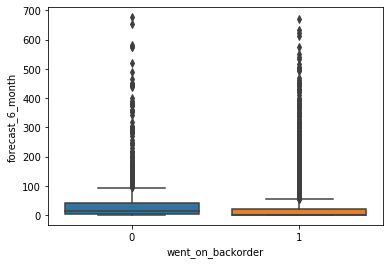

In [46]:
sns.boxplot(x="went_on_backorder", y=l[1], data=data1)

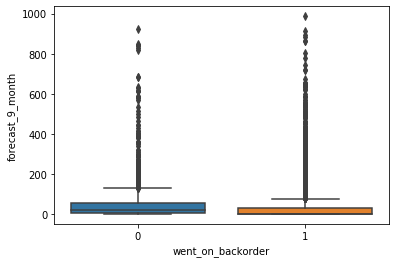

In [47]:
sns.boxplot(x="went_on_backorder", y=l[2], data=data1)

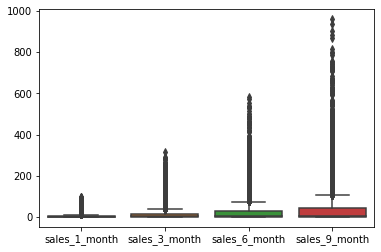

In [48]:
sns.boxplot(data=data1[["sales_1_month","sales_3_month","sales_6_month","sales_9_month"]])

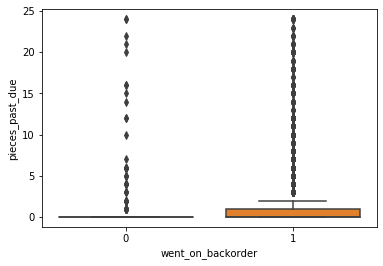

In [49]:
sns.boxplot(x="went_on_backorder", y="pieces_past_due", data=data1)

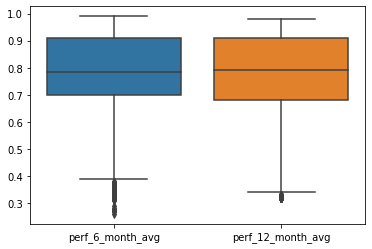

In [50]:
sns.boxplot(data=data1[["perf_6_month_avg","perf_12_month_avg"]])

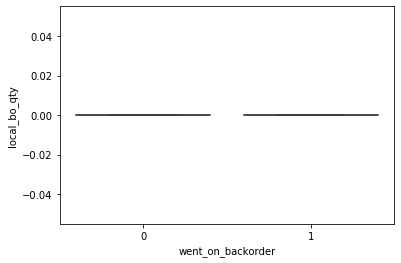

In [51]:
sns.boxplot(x="went_on_backorder", y="local_bo_qty", data=data1)

In [52]:
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

national_inv          63.00
lead_time              6.00
in_transit_qty         1.00
forecast_3_month      60.00
forecast_6_month     105.00
forecast_9_month     151.00
sales_1_month         13.00
sales_3_month         46.00
sales_6_month         89.00
sales_9_month        131.00
min_bank              17.00
potential_issue        0.00
pieces_past_due        1.00
perf_6_month_avg       0.36
perf_12_month_avg      0.29
local_bo_qty           0.00
deck_risk              0.00
oe_constraint          0.00
ppap_risk              0.00
stop_auto_buy          0.00
rev_stop               0.00
went_on_backorder      1.00
dtype: float64


In [53]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR
print("------------Lower bounds-------------")
print(lower_bound)
print()
print("------------Upper bounds-------------")
print(upper_bound)

------------Lower bounds-------------
national_inv         -92.500
lead_time             -7.000
in_transit_qty        -1.500
forecast_3_month     -90.000
forecast_6_month    -157.500
forecast_9_month    -226.500
sales_1_month        -19.500
sales_3_month        -69.000
sales_6_month       -133.500
sales_9_month       -196.500
min_bank             -25.500
potential_issue        1.000
pieces_past_due       -1.500
perf_6_month_avg       0.040
perf_12_month_avg      0.205
local_bo_qty           0.000
deck_risk              1.000
oe_constraint          1.000
ppap_risk              1.000
stop_auto_buy          0.000
rev_stop               1.000
went_on_backorder     -1.500
dtype: float64

------------Upper bounds-------------
national_inv         159.500
lead_time             17.000
in_transit_qty         2.500
forecast_3_month     150.000
forecast_6_month     262.500
forecast_9_month     377.500
sales_1_month         32.500
sales_3_month        115.000
sales_6_month        222.500
sales_9_m

In [54]:
print((data<lower_bound) | (data>upper_bound))

      national_inv  lead_time  in_transit_qty  forecast_3_month  \
2            False      False           False             False   
3            False      False           False             False   
4            False      False           False             False   
5            False      False           False             False   
6            False      False           False             False   
...            ...        ...             ...               ...   
9683         False      False           False             False   
9684         False      False            True             False   
9685         False      False            True             False   
9686         False      False           False             False   
9687         False      False           False             False   

      forecast_6_month  forecast_9_month  sales_1_month  sales_3_month  \
2                False             False          False          False   
3                False             False       

In [55]:
data2=data[~((data<lower_bound) | (data>upper_bound)).any(axis=1)]
data2.shape

(3455, 22)

In [56]:
data2.isna().sum()

national_inv         0
lead_time            0
in_transit_qty       0
forecast_3_month     0
forecast_6_month     0
forecast_9_month     0
sales_1_month        0
sales_3_month        0
sales_6_month        0
sales_9_month        0
min_bank             0
potential_issue      0
pieces_past_due      0
perf_6_month_avg     0
perf_12_month_avg    0
local_bo_qty         0
deck_risk            0
oe_constraint        0
ppap_risk            0
stop_auto_buy        0
rev_stop             0
went_on_backorder    0
dtype: int64

In [57]:
data2.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
2,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.70,0.73,0.0,1,1,1,0,1,0
3,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,2.0,2.0,...,0.0,0.70,0.73,0.0,1,1,1,0,1,0
4,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,0.0,0.0,...,0.0,0.95,0.94,0.0,1,1,1,0,1,0
6,0.0,8.0,0.0,2.0,3.0,4.0,0.0,1.0,2.0,2.0,...,0.0,0.56,0.68,0.0,1,1,1,0,1,0
7,0.0,8.0,0.0,22.0,44.0,60.0,0.0,0.0,0.0,0.0,...,0.0,0.83,0.91,0.0,1,1,1,0,1,0


In [58]:
data2.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
national_inv,1.000000,-0.037940,0.018935,0.021192,0.097238,0.145141,0.152506,0.218571,0.262762,0.285617,...,-0.040489,0.090373,0.083396,NaN,NaN,NaN,NaN,NaN,NaN,0.288707
lead_time,-0.037940,1.000000,-0.014256,-0.005178,-0.035710,-0.042105,-0.085984,-0.079855,-0.068167,-0.050848,...,0.001318,-0.157326,-0.112673,NaN,NaN,NaN,NaN,NaN,NaN,0.083210
in_transit_qty,0.018935,-0.014256,1.000000,0.075675,0.084054,0.075621,0.066715,0.088298,0.095862,0.097617,...,0.172514,-0.004072,-0.012388,NaN,NaN,NaN,NaN,NaN,NaN,0.012169
forecast_3_month,0.021192,-0.005178,0.075675,1.000000,0.920504,0.865346,0.578459,0.667899,0.646312,0.642406,...,0.055589,-0.011570,-0.017336,NaN,NaN,NaN,NaN,NaN,NaN,-0.315480
forecast_6_month,0.097238,-0.035710,0.084054,0.920504,1.000000,0.963429,0.652459,0.758238,0.742036,0.735374,...,0.066050,0.019322,0.013297,NaN,NaN,NaN,NaN,NaN,NaN,-0.305387
forecast_9_month,0.145141,-0.042105,0.075621,0.865346,0.963429,1.000000,0.667069,0.777249,0.769616,0.762938,...,0.062602,0.034047,0.026210,NaN,NaN,NaN,NaN,NaN,NaN,-0.286176
sales_1_month,0.152506,-0.085984,0.066715,0.578459,0.652459,0.667069,1.000000,0.882316,0.827528,0.800839,...,-0.003659,0.064833,0.050784,NaN,NaN,NaN,NaN,NaN,NaN,-0.323965
sales_3_month,0.218571,-0.079855,0.088298,0.667899,0.758238,0.777249,0.882316,1.000000,0.956592,0.929014,...,0.024825,0.062317,0.054181,NaN,NaN,NaN,NaN,NaN,NaN,-0.292292
sales_6_month,0.262762,-0.068167,0.095862,0.646312,0.742036,0.769616,0.827528,0.956592,1.000000,0.978353,...,0.038031,0.065540,0.054930,NaN,NaN,NaN,NaN,NaN,NaN,-0.247015
sales_9_month,0.285617,-0.050848,0.097617,0.642406,0.735374,0.762938,0.800839,0.929014,0.978353,1.000000,...,0.034948,0.063688,0.054716,NaN,NaN,NaN,NaN,NaN,NaN,-0.232225


In [59]:
x=data2.drop(["went_on_backorder"],axis=1)
y =data2["went_on_backorder"]
scalar = StandardScaler()
x_scaled = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x_scaled.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
0,-0.544574,-1.569358,-0.195445,-0.236150,-0.252246,-0.336828,-0.556238,-0.591955,-0.593348,-0.595770,...,0.0,-0.207203,-0.497464,-0.377405,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.241378,0.249437,-0.195445,0.193819,0.507438,0.705366,-0.056549,-0.428385,-0.509892,-0.539066,...,0.0,-0.207203,-0.497464,-0.377405,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.544574,0.249437,-0.195445,0.070971,0.013644,-0.102334,-0.556238,-0.591955,-0.593348,-0.595770,...,0.0,-0.207203,0.781397,0.776616,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.544574,0.249437,-0.195445,-0.358998,-0.404183,-0.414992,-0.556238,-0.510170,-0.509892,-0.539066,...,0.0,-0.207203,-1.213627,-0.652171,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.544574,0.249437,-0.195445,0.869485,1.153169,1.044079,-0.556238,-0.591955,-0.593348,-0.595770,...,0.0,-0.207203,0.167544,0.611756,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
x_scaled.corr()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
national_inv,1.000000,-0.037940,0.018935,0.021192,0.097238,0.145141,0.152506,0.218571,0.262762,0.285617,...,NaN,-0.040489,0.090373,0.083396,NaN,NaN,NaN,NaN,NaN,NaN
lead_time,-0.037940,1.000000,-0.014256,-0.005178,-0.035710,-0.042105,-0.085984,-0.079855,-0.068167,-0.050848,...,NaN,0.001318,-0.157326,-0.112673,NaN,NaN,NaN,NaN,NaN,NaN
in_transit_qty,0.018935,-0.014256,1.000000,0.075675,0.084054,0.075621,0.066715,0.088298,0.095862,0.097617,...,NaN,0.172514,-0.004072,-0.012388,NaN,NaN,NaN,NaN,NaN,NaN
forecast_3_month,0.021192,-0.005178,0.075675,1.000000,0.920504,0.865346,0.578459,0.667899,0.646312,0.642406,...,NaN,0.055589,-0.011570,-0.017336,NaN,NaN,NaN,NaN,NaN,NaN
forecast_6_month,0.097238,-0.035710,0.084054,0.920504,1.000000,0.963429,0.652459,0.758238,0.742036,0.735374,...,NaN,0.066050,0.019322,0.013297,NaN,NaN,NaN,NaN,NaN,NaN
forecast_9_month,0.145141,-0.042105,0.075621,0.865346,0.963429,1.000000,0.667069,0.777249,0.769616,0.762938,...,NaN,0.062602,0.034047,0.026210,NaN,NaN,NaN,NaN,NaN,NaN
sales_1_month,0.152506,-0.085984,0.066715,0.578459,0.652459,0.667069,1.000000,0.882316,0.827528,0.800839,...,NaN,-0.003659,0.064833,0.050784,NaN,NaN,NaN,NaN,NaN,NaN
sales_3_month,0.218571,-0.079855,0.088298,0.667899,0.758238,0.777249,0.882316,1.000000,0.956592,0.929014,...,NaN,0.024825,0.062317,0.054181,NaN,NaN,NaN,NaN,NaN,NaN
sales_6_month,0.262762,-0.068167,0.095862,0.646312,0.742036,0.769616,0.827528,0.956592,1.000000,0.978353,...,NaN,0.038031,0.065540,0.054930,NaN,NaN,NaN,NaN,NaN,NaN
sales_9_month,0.285617,-0.050848,0.097617,0.642406,0.735374,0.762938,0.800839,0.929014,0.978353,1.000000,...,NaN,0.034948,0.063688,0.054716,NaN,NaN,NaN,NaN,NaN,NaN


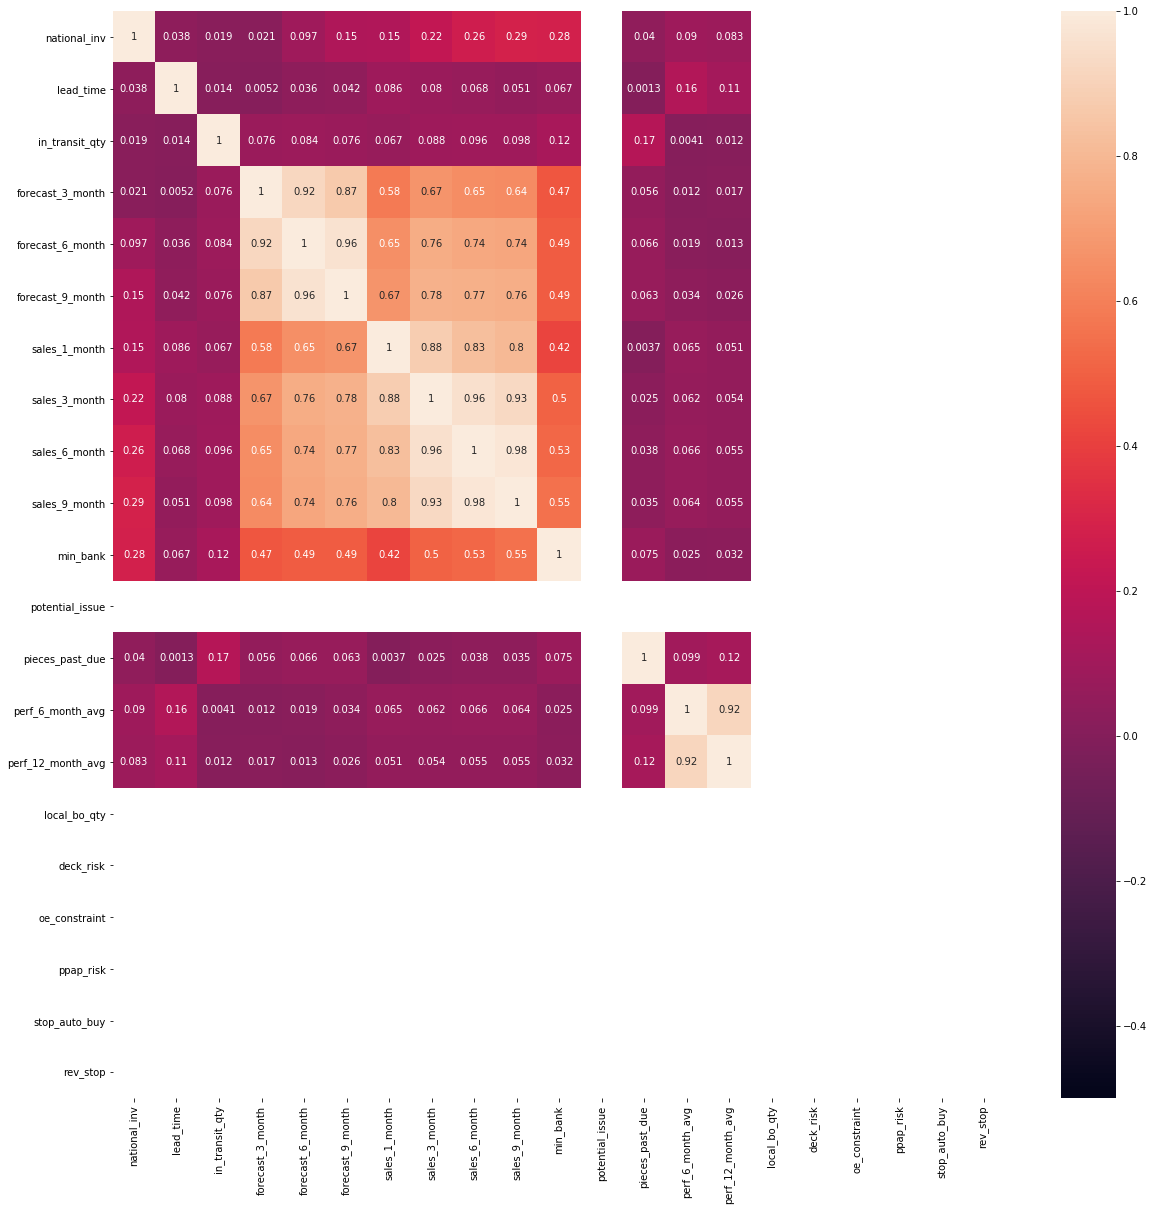

In [61]:
plt.figure(figsize=(20,20))
plt_data =x_scaled
sns.heatmap(plt_data.corr().abs(), vmin = -0.5,vmax = 1,annot=True)

In [62]:
x=sm.add_constant(x)
x.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,potential_issue,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop
2,0.0,2.0,0.0,4.0,7.0,7.0,0.0,0.0,0.0,0.0,...,1,0.0,0.70,0.73,0.0,1,1,1,0,1
3,7.0,8.0,0.0,11.0,27.0,47.0,2.0,2.0,2.0,2.0,...,1,0.0,0.70,0.73,0.0,1,1,1,0,1
4,0.0,8.0,0.0,9.0,14.0,16.0,0.0,0.0,0.0,0.0,...,1,0.0,0.95,0.94,0.0,1,1,1,0,1
6,0.0,8.0,0.0,2.0,3.0,4.0,0.0,1.0,2.0,2.0,...,1,0.0,0.56,0.68,0.0,1,1,1,0,1
7,0.0,8.0,0.0,22.0,44.0,60.0,0.0,0.0,0.0,0.0,...,1,0.0,0.83,0.91,0.0,1,1,1,0,1


In [63]:
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      went_on_backorder   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.274
Method:                 Least Squares   F-statistic:                     93.91
Date:                Mon, 14 Jun 2021   Prob (F-statistic):          2.67e-229
Time:                        15:04:02   Log-Likelihood:                -1906.2
No. Observations:                3455   AIC:                             3842.
Df Residuals:                    3440   BIC:                             3935.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
national_inv          0.0070      0.000     20.430      0.000       0.006       0.008
lead_time             0.0100      0.002      4.475      0.000       0.006       0.014
in_transit_qty        0.0105      0.026      0.401      0.689      -0.041       0.062
forecast_3_month     -0.0040      0.001     -3.433      0.001      -0.006      -0.002
forecast_6_month     -0.0008      0.001     -0.590      0.555      -0.003       0.002
forecast_9_month     -0.0003      0.001     -0.430      0.667      -0.002       0.001
sales_1_month        -0.0261      0.004     -6.781      0.000      -0.034      -0.019
sales_3_month        -0.0068      0.003     -2.730      0.006      -0.012      -0.002
sales_6_month         0.0041      0.002      2.219      0.027       0.000       0.008
sales_9_month        -0.0016      0.001     -1.563      0.118      -0.004       0.000
min_bank              0.0101      0.002      4.878      0.000       0.006       0.014
potential_issue       0.0871      0.008     11.323      0.000       0.072       0.102
pieces_past_due       0.2587      0.025     10.382      0.000       0.210       0.308
perf_6_month_avg      0.0029      0.093      0.031      0.975      -0.180       0.186
perf_12_month_avg     0.0991      0.100      0.995      0.320      -0.096       0.295
local_bo_qty               0          0        nan        nan           0           0
deck_risk             0.0871      0.008     11.323      0.000       0.072       0.102
oe_constraint         0.0871      0.008     11.323      0.000       0.072       0.102
ppap_risk             0.0871      0.008     11.323      0.000       0.072       0.102
stop_auto_buy              0          0        nan        nan           0           0
rev_stop              0.0871      0.008     11.323      0.000       0.072       0.102
==============================================================================
Omnibus:                    77381.926   Durbin-Watson:                   0.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              297.709
Skew:                          -0.240   Prob(JB):                     2.26e-65
Kurtosis:                       1.644   Cond. No.                          inf
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is      0. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Now remove the columns with multi collinearity

In [64]:
data3=data2.drop(columns=["in_transit_qty","forecast_6_month","forecast_9_month","sales_9_month","perf_6_month_avg","perf_12_month_avg","local_bo_qty","deck_risk","oe_constraint","ppap_risk","stop_auto_buy","rev_stop"])

In [65]:
data3=data3.drop(columns=["sales_6_month"])

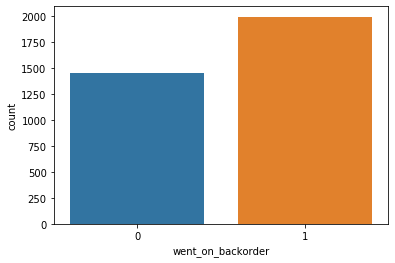

In [66]:
sns.countplot(x='went_on_backorder',data=data3)

In [67]:
x=data3.drop(["went_on_backorder"],axis=1)
y =data3["went_on_backorder"]
scalar = StandardScaler()
x_scaled = pd.DataFrame(scalar.fit_transform(x),columns=x.columns)
x_scaled.head()

,national_inv,lead_time,forecast_3_month,sales_1_month,sales_3_month,min_bank,potential_issue,pieces_past_due
0,-0.544574,-1.569358,-0.236150,-0.556238,-0.591955,-0.348970,0.0,-0.207203
1,-0.241378,0.249437,0.193819,-0.056549,-0.428385,-0.348970,0.0,-0.207203
2,-0.544574,0.249437,0.070971,-0.556238,-0.591955,-0.119838,0.0,-0.207203
3,-0.544574,0.249437,-0.358998,-0.556238,-0.510170,-0.119838,0.0,-0.207203
4,-0.544574,0.249437,0.869485,-0.556238,-0.591955,-0.119838,0.0,-0.207203


In [170]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.33,random_state=120)

In [171]:
lr = LogisticRegression()

In [172]:
lr.fit(x_train,y_train)

LogisticRegression()

In [173]:
lr.score(x_test,y_test)

0.8431200701139352

In [174]:
lr.score(x_train,y_train)

0.8305963699222126

In [183]:
knn=KNeighborsClassifier(n_neighbors=10)

In [184]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [185]:
knn.score(x_test,y_test)

0.845749342681858

In [186]:
knn.score(x_train,y_train)

0.8556611927398444

In [187]:
conf_mat=confusion_matrix(y_test,lr.predict(x_test))
conf_mat

array([[367, 123],
       [ 56, 595]], dtype=int64)

In [188]:
conf_mat=confusion_matrix(y_test,knn.predict(x_test))
conf_mat

array([[412,  78],
       [ 98, 553]], dtype=int64)

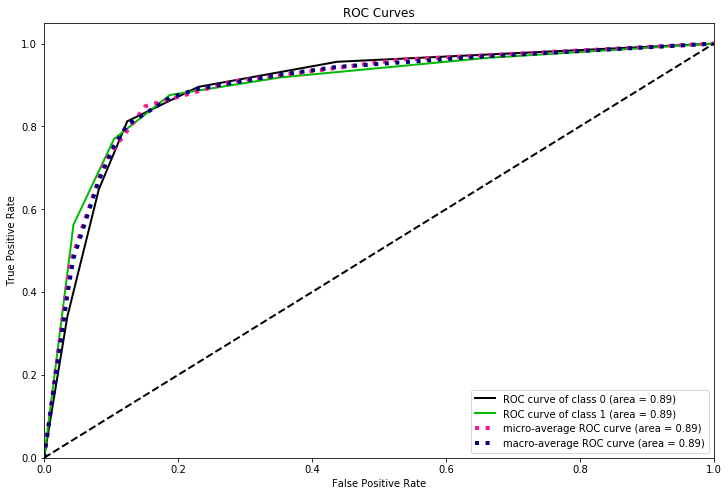

In [159]:
import scikitplot
pred_proba=knn.predict_proba(x_test)
scikitplot.metrics.plot_roc_curve(y_test,pred_proba,figsize=(12,8))

In [168]:
data3.head()

,national_inv,lead_time,forecast_3_month,sales_1_month,sales_3_month,min_bank,potential_issue,pieces_past_due,went_on_backorder
2,0.0,2.0,4.0,0.0,0.0,0.0,1,0.0,0
3,7.0,8.0,11.0,2.0,2.0,0.0,1,0.0,0
4,0.0,8.0,9.0,0.0,0.0,1.0,1,0.0,0
6,0.0,8.0,2.0,0.0,1.0,1.0,1,0.0,0
7,0.0,8.0,22.0,0.0,0.0,1.0,1,0.0,0


In [189]:
knn.predict(np.array([[0,2,4,0,0,0,1,0]]))[0]

0

In [190]:
import pickle
filename='finalized_model_backorder.pickle'
pickle.dump(knn,open(filename,'wb'))

In [192]:
model=pickle.load(open(filename,'rb'))
model.predict(np.array([[0,2,4,0,0,0,1,0]]))

array([0], dtype=int64)

In [198]:
model.predict_proba(np.array([[0,2,4,0,0,0,1,0]]))[0][1]*100#percentage of backorder

50.0

In [203]:
model.predict_proba(np.array([[0,8,22,0,0,0,1,0]]))[0][1]*100

10.0

In [201]:
model.predict(np.array([[0,8,22,0,0,0,1,0]]))[0]

0